In [1]:
from glob import glob

from osgeo import gdal

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

In [2]:
np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [24]:
S_sentinel_bands = glob("/Users/francescamorini/projects/satellite_filmuni/scripts/data-manipulation/single_band/b?.tif")

S_sentinel_bands.sort()

l = []

for i in S_sentinel_bands:
    with rio.open(i, 'r') as f:
        l.append(f.read(1))

arr_st = np.stack(l)
print(f"There are {len(arr_st)} bands available in folder")


There are 9 bands available in folder


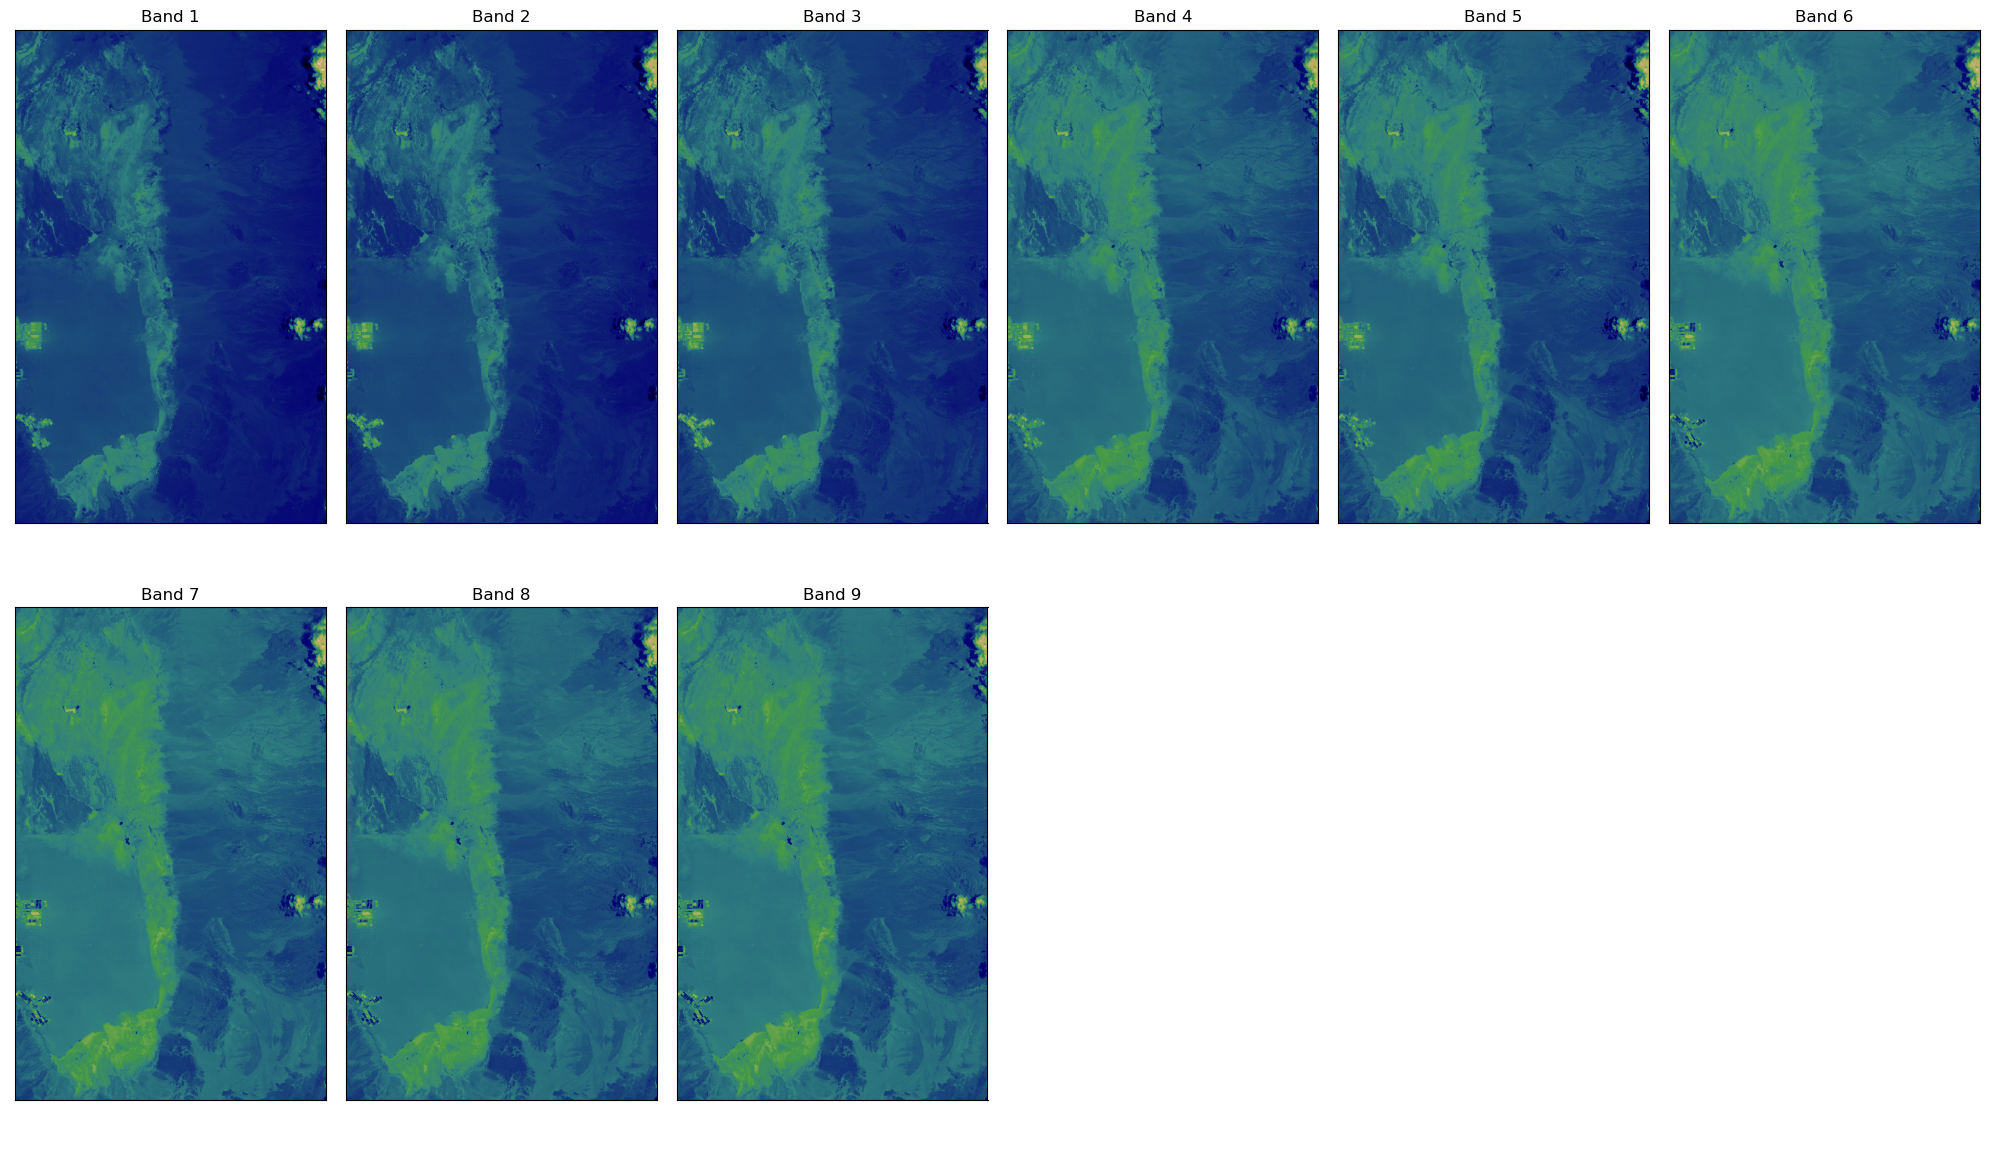

In [9]:
ep.plot_bands(arr_st,
              cmap='gist_earth',
              figsize=(20, 12),
              cols=6,
              cbar=False)
plt.show()


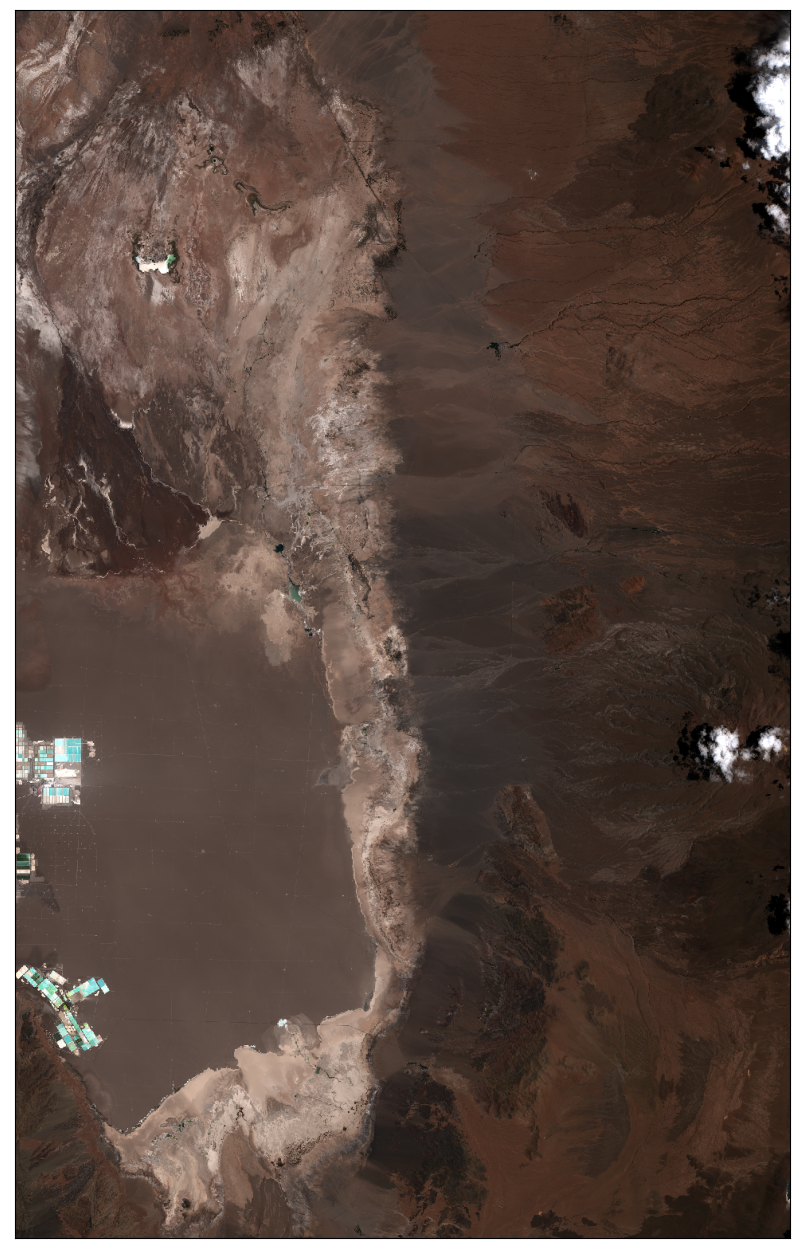

In [12]:
# RGB Composite Image with Strech

ep.plot_rgb(arr_st,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()


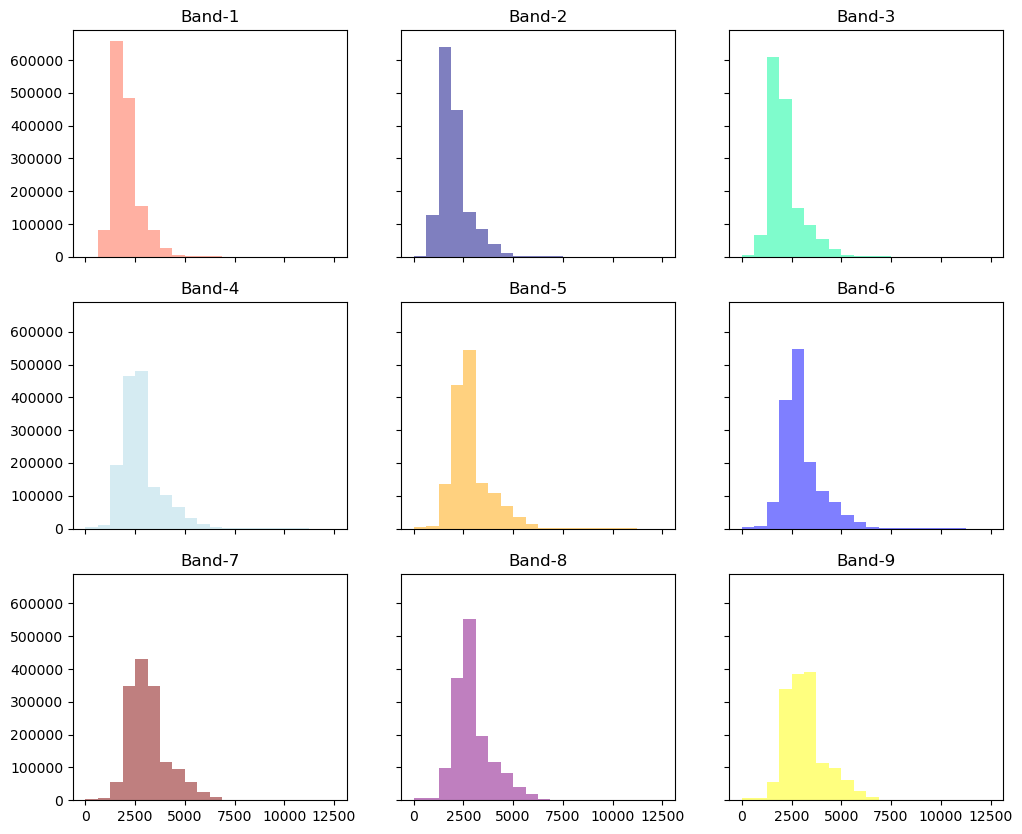

In [19]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st,
        colors=colors,
        title=[f'Band-{i}' for i in range(1, 10)],
        cols=3,
        alpha=0.5,
        figsize=(12, 10))

plt.show()


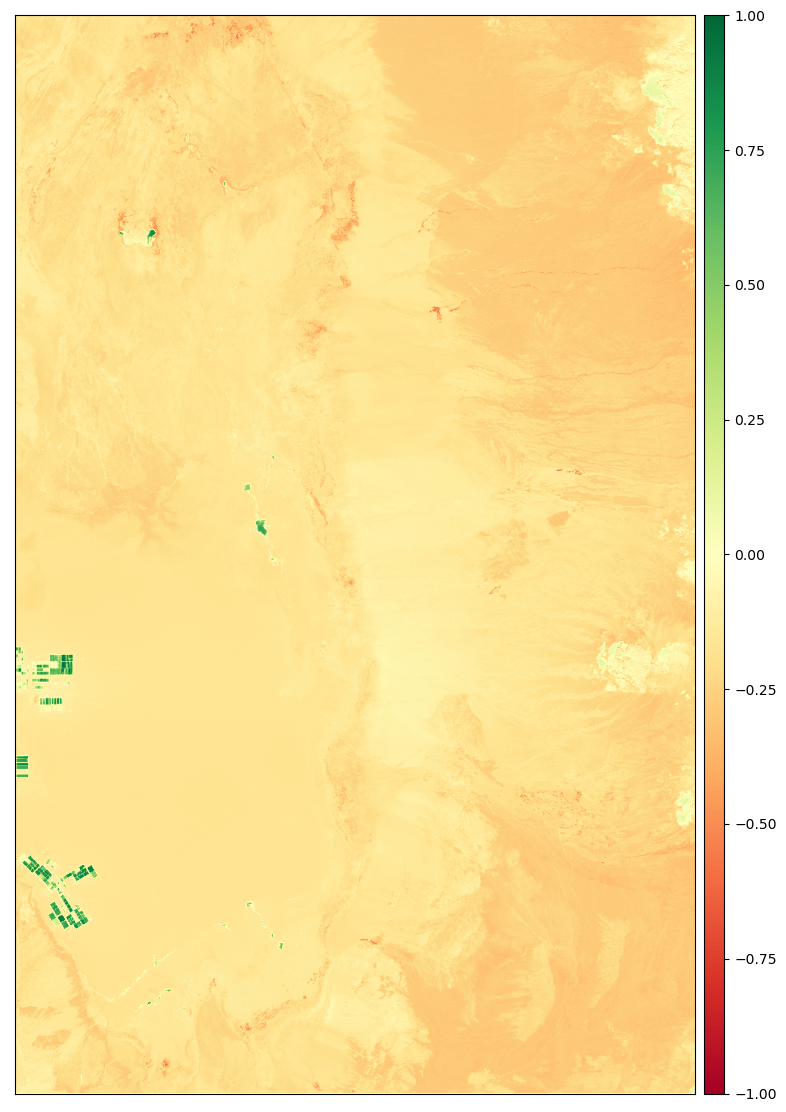

In [22]:
mndwi = es.normalized_diff(arr_st[2], arr_st[8])

ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()
